In [1]:
import sys
import os
import math
import matplotlib.pyplot as plt
import numpy as np

PROJECT_ROOT = os.path.abspath(os.pardir)
sys.path.append(PROJECT_ROOT)

%matplotlib widget

In [2]:
bigLUT = np.load('data/lut.npy')
d = np.load('data/lutAxes.npz')
energies = d['arr_0']
stepsizeArray = d['arr_1']
densityArray = d['arr_2']

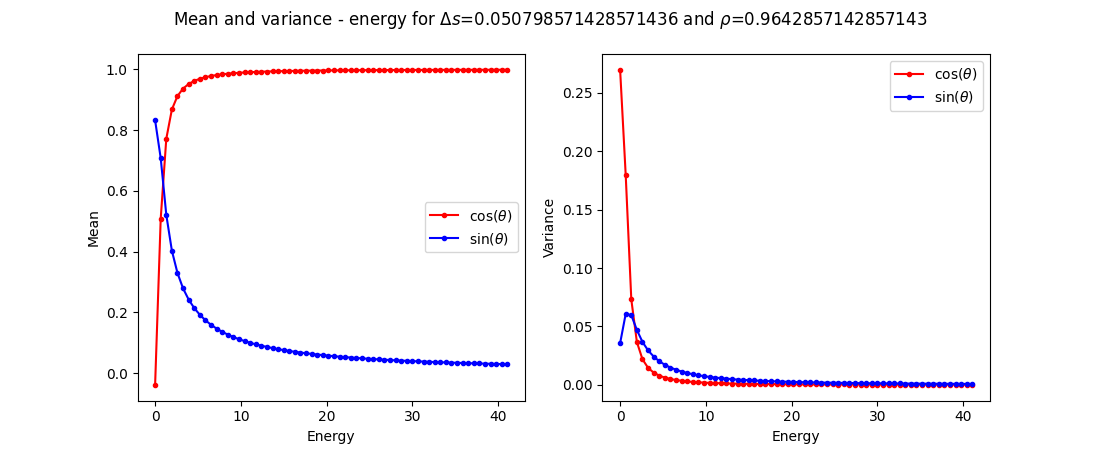

In [3]:
# TODO: checkout semilogy plot
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Mean and variance - energy for $\Delta s$={stepsizeArray[stepsizeIndex]} and $\\rho$={densityArray[densityIndex]}')

ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 0], '.-r', label=f'$\cos(\\theta)$')
ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 1], '.-b', label=f'$\sin(\\theta)$')
ax1.set_ylabel('Mean')
ax1.set_xlabel('Energy')
ax1.legend()

ax2.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 2], '.-r', label=f'$\cos(\\theta)$')
ax2.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 3], '.-b', label=f'$\sin(\\theta)$')
ax2.set_ylabel('Variance')
ax2.set_xlabel('Energy')
ax2.legend()


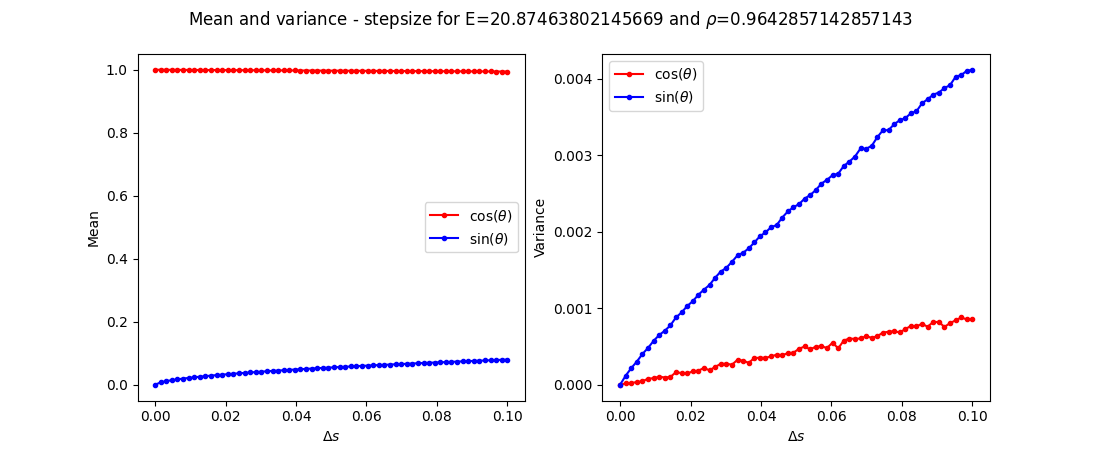

In [4]:
energyIndex = energies.size//2
densityIndex = densityArray.size//2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Mean and variance - stepsize for E={energies[energyIndex]} and $\\rho$={densityArray[densityIndex]}')

ax1.plot(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 0], '.-r', label=f'$\cos(\\theta)$')
ax1.plot(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 1], '.-b', label=f'$\sin(\\theta)$')
ax1.set_ylabel('Mean')
ax1.set_xlabel('$\Delta s$')
ax1.legend()

ax2.plot(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 2], '.-r', label=f'$\cos(\\theta)$')
ax2.plot(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 3], '.-b', label=f'$\sin(\\theta)$')
ax2.set_ylabel('Variance')
ax2.set_xlabel('$\Delta s$')
ax2.legend()


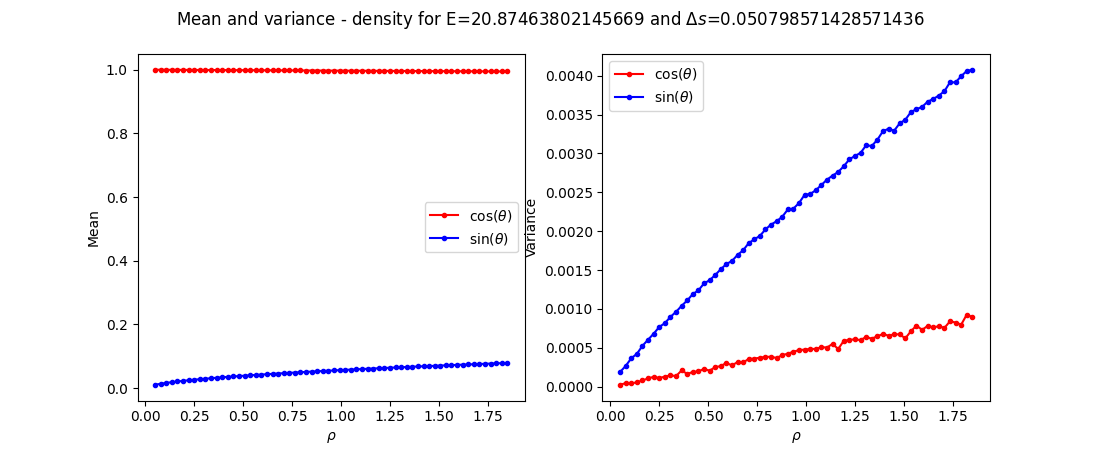

In [5]:
energyIndex = energies.size//2
stepsizeIndex = stepsizeArray.size//2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Mean and variance - density for E={energies[energyIndex]} and $\\Delta s$={stepsizeArray[stepsizeIndex]}')

ax1.plot(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 0], '.-r', label=f'$\cos(\\theta)$')
ax1.plot(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 1], '.-b', label=f'$\sin(\\theta)$')
ax1.set_ylabel('Mean')
ax1.set_xlabel('$\\rho$')
ax1.legend()

ax2.plot(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 2], '.-r', label=f'$\cos(\\theta)$')
ax2.plot(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 3], '.-b', label=f'$\sin(\\theta)$')
ax2.set_ylabel('Variance')
ax2.set_xlabel('$\\rho$')
ax2.legend()


In [6]:
def find_nearest1(array, value) -> int:
    # When value is exactly between to numbers in array, the second is taken.
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

def find_nearest2(array, value) -> int:
    # When value is exactly between to numbers in array, the first is taken.
    idx = np.abs(array-value).argmin()
    return idx

In [7]:
testArray = np.arange(0, 64)
value = 1.51
print(find_nearest1(testArray, value))
print(find_nearest2(testArray, value))

2
2


In [8]:
import time
N = int(1e4)

In [9]:
_= [find_nearest1(testArray, t) for t in np.random.randint(0, 64, size=N)]

t3 = time.process_time()
y = [find_nearest2(testArray, t) for t in np.random.randint(0, 64, size=N)]
t4 = time.process_time()
t1 = time.process_time()
x = [find_nearest1(testArray, t) for t in np.random.randint(0, 64, size=N)]
t2 = time.process_time()

print(f'Searchsorted1 time: {t2-t1}s')
print(f'Searchsorted2 time: {t4-t3}s')

Searchsorted1 time: 0.1037029890000003s
Searchsorted2 time: 0.062497973999999346s


In [10]:
from electronTransportCode.ParticleModel import SimplifiedEGSnrcElectron
from electronTransportCode.Material import WaterMaterial


In [11]:
# No zero elements LUT!
energy = 0.036579699130547066
stepsize = 0.0006712792226017431

particle = SimplifiedEGSnrcElectron(4, '3d')
np.where(particle.varLUT == 0.0)[0]

array([], dtype=int64)